In [211]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [212]:
img = cv2.imread('coin3.jpg')

org_img = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [213]:
ret, threshold = cv2.threshold(gray,48,255,cv2.THRESH_BINARY)
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
threshold = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 1)

In [214]:
kernel = np.ones((2, 2), np.uint8)

erosion = cv2.erode(threshold, kernel, iterations=3)
closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel, iterations=3)

cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [215]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 200 or area > 4000:
        continue
        
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img, ellipse, (0,255,0), 5)

In [216]:
#img = cv2.drawContours(img, contours, -1, (0,255,0), 2)

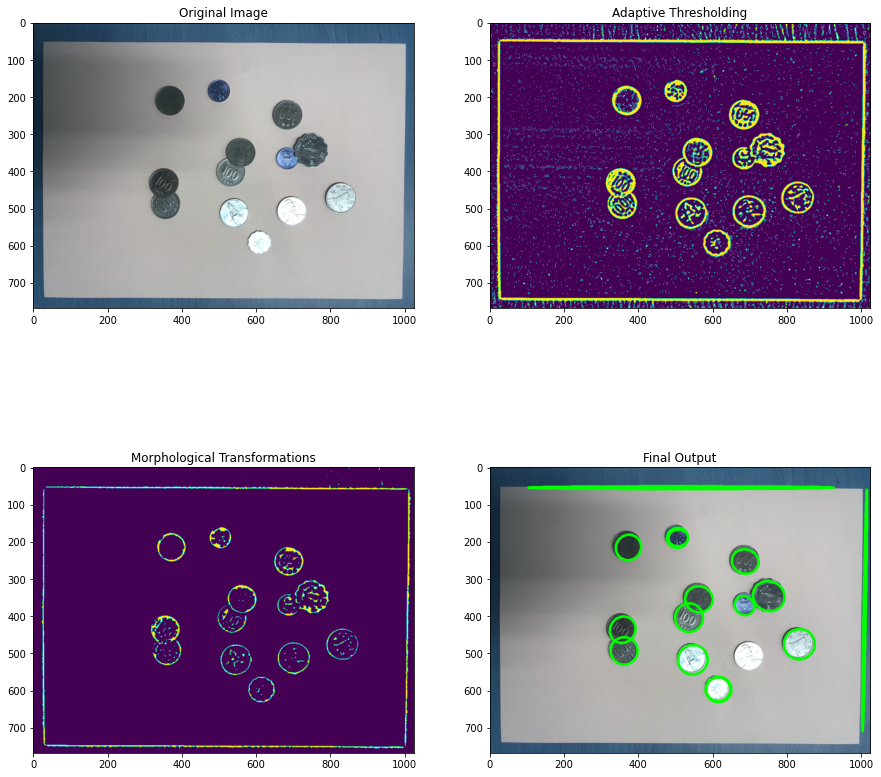

In [217]:
plt.figure(figsize=(15,15), facecolor='white')
plt.subplot(221),plt.imshow(org_img),plt.title('Original Image')
plt.subplot(222),plt.imshow(threshold),plt.title('Adaptive Thresholding')
plt.subplot(223),plt.imshow(closing),plt.title('Morphological Transformations')
plt.subplot(224),plt.imshow(img),plt.title('Final Output')
plt.show()

In [218]:
cv2.imshow("Adaptive Thresholding", threshold)
cv2.imwrite("Adaptive Thresholding.png", threshold)
cv2.imshow("Morphological Transformations", closing)
cv2.imwrite("Morphological Transformations.png", closing)
cv2.imshow("Contours", img)
cv2.imwrite("Contours.png", img)
cv2.waitKey(0)
cv2.destroyAllWindows()